# Trabalho de Estatística - Regressão Linear

Juliana Carolina Thuler dos Santos            

Turma: 294 DS

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
from sklearn.datasets import load_boston

house_price = load_boston()
df = pd.DataFrame(house_price.data, columns=house_price.feature_names)
df['PRICE'] = house_price.target

In [28]:
#Regressão Linear
feat = house_price.data
target = house_price.target

from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(feat,target, test_size = 0.25, random_state = 42)

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
reg = LR.fit(x_train,y_train)

In [29]:
#Regressão Linear do teste
resp = reg.predict(x_test)

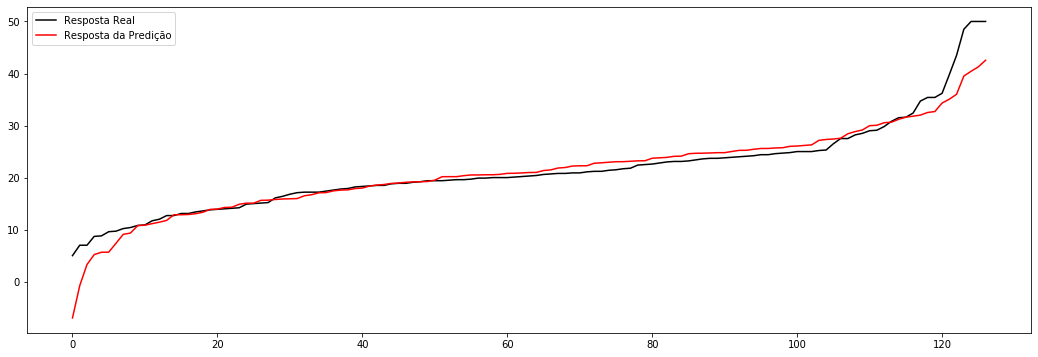

In [73]:
#Primeira Análise Visual: Resposta Real (y_test) x Resposta Fornecida (resp)
compare = pd.DataFrame(data = {'Teste': y_test, 'Fornecido':resp})

x = compare.index.values
y1 = compare.Teste.values
y2 = compare.Fornecido.values

plt.figure(figsize=(18,6))

plt.plot(x,sorted(list(y1)),color = 'black')
plt.plot(x,sorted(list(y2)),color = 'red')

plt.legend(['Resposta Real','Resposta da Predição'])

plt.show()

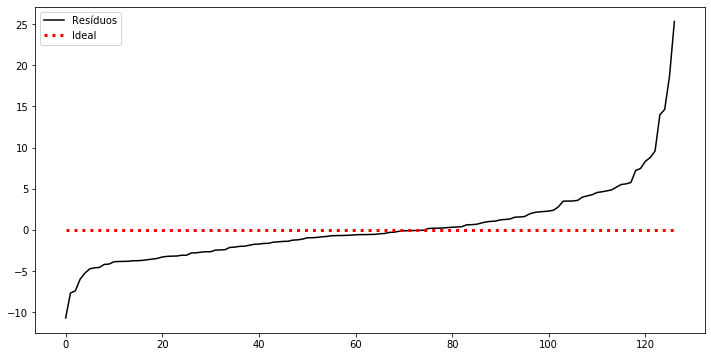

In [65]:
#Distribuição dos resíduos em torno de zero

x = compare.index.values
y3 = sorted(list(compare.Teste.values - compare.Fornecido.values))
y4 = np.zeros(len(y3))

plt.figure(figsize=(12,6))

plt.plot(x,y3,color = 'black',linewidth=1.5)
plt.plot(x,y4,':',color = 'red',linewidth=3)

plt.legend(['Resíduos','Ideal'])

plt.show()

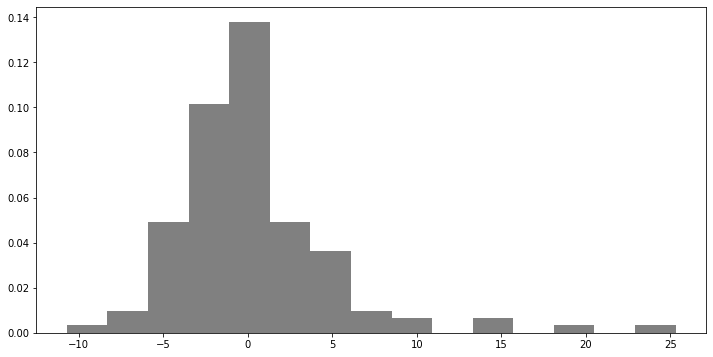

In [77]:
#Histograma dos erros
plt.figure(figsize=(12,6))

plt.hist(y3,bins=15,color = 'gray',density = True)

plt.show()

In [31]:
#Parâmetros
print('Intercepto:', round(reg.intercept_,4))
print('\nCoeficientes:')
for i in reg.coef_:
    print(round(i,4))

Intercepto: 29.8364

Coeficientes:
-0.1283
0.0296
0.0489
2.7735
-16.2388
4.3688
-0.0092
-1.4009
0.2578
-0.01
-0.9231
0.0132
-0.5176


In [43]:
#R-quadrado (coefficient of determination) - do modelo de regressão
SS_Residual = sum((y_train-reg.predict(x_train))**2)       
SS_Total = sum((y_train-np.mean(y_train))**2)     
r_squared = round((1 - (float(SS_Residual))/SS_Total),4)

#R-quadrado - da predição (resposta real x resposta fornecida)
from sklearn.metrics import r2_score
r2 = round(r2_score(y1,y2),4)

#RMSE - Análise de Resíduo
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = round(sqrt(mean_squared_error(y1,y2)),4)

#coefficient of variation of the RMSE
#https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-the-coefficient-of-variation/

nrmse = round((rmse/(df.PRICE.mean())),4)*100

r_squared ,r2 ,rmse ,nrmse

(0.7481, 0.6844, 4.7009, 20.86)

### Considerações

Até então, a partir de análise visual, a curva predita aparentemente se aproxima da curva de respostas originais. Mais além, os erros também aparentam estar concentrados em torno de zero e, juntamente com o histograma, aparentam ter uma distribuição normal. 

O R-quadrado dos dados de treino diferem do R-quadrado dos dados de teste, porém são próximos; o RMSE encontra-se em torno de 4, e o coeficiente de variação do RMSE se encontra em torno de 20%, considerado relativamente alto. 

Esses valores podem ser melhorados com mais dados, exclusão de possíveis variáveis e retreinos ao longo do tempo.

In [7]:
#TABELA PARA ANÁLISE DOS PARÂMETROS
#https://www.accelebrate.com/blog/interpreting-results-from-linear-regression-is-the-data-appropriate

# with statsmodels
import statsmodels.api as sm

x_train = sm.add_constant(x_train) # adding a constant

model = sm.OLS(y_train, x_train).fit()

x_test = sm.add_constant(x_test)
predictions = model.predict(x_test) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     83.38
Date:                Fri, 03 Apr 2020   Prob (F-statistic):          1.15e-100
Time:                        13:57:03   Log-Likelihood:                -1126.4
No. Observations:                 379   AIC:                             2281.
Df Residuals:                     365   BIC:                             2336.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.8364      5.861      5.090      0.0

In [44]:
residual = model.resid

(0.9091842174530029, 2.623767055129258e-14)

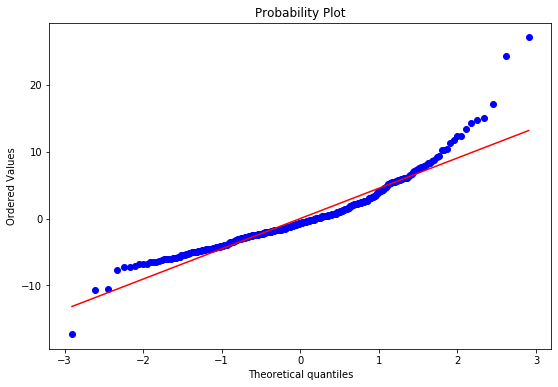

In [46]:
import scipy as sp
fig, ax = plt.subplots(figsize=(9,6))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
sp.stats.shapiro(residual)

### Considerações Finais

A probabilidade da estatística F comprova que o modelo é estatisticamente significativo (P(F)< 0.05).

O valor de "Skew" maior do que zero e o valor de "Kurtosis" indica a assimetria, mas com pico e baixo valor de outliers - o que já havia sido observado no histograma dos erros. 

O teste de Normalidade de Shapiro-Wilk, a partir de W > P-valor, comprovam a normalidade dos erros, conforme hipótese levantada a partir de análise visual.

Como sugestão, a fim de melhorar o modelo, observando a tabela de parâmetros, na coluna P > |t|, no nível de significância 0.05, pode ser realizada a exclusão das variáveis representadas por x2, x3, x7 e x10.